In [1]:
import spotipy
import spotipy.util as util
from datetime import datetime
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
username = "Goeldk"
scope = "user-library-read"
#export SPOTIPY_CLIENT_ID ='3aa12f8e691c4df69ea5cf90a8d14b83'
#export SPOTIPY_CLIENT_SECRET ='380a5fc6c96e4fdcaf568425b919a00e'
#export SPOTIPY_REDIRECT_URI ='http://localhost:8888'
#client_credentials_manager = SpotifyClientCredentials(client_id='3aa12f8e691c4df69ea5cf90a8d14b83', client_secret='380a5fc6c96e4fdcaf568425b919a00e')
token = util.prompt_for_user_token(username,scope,client_id='35018e55ab1d418f85142ed667b3f069',client_secret='5150cff246404d1795f3d4c2c559e902',redirect_uri='http://localhost:8888/callback/')


#playlists = sp.user_playlists('rckprnv')
if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks()
    for item in results['items']:
        track = item['track']
        print (track['name'] + ' - ' + track['artists'][0]['name'])
else:
    print ("Can't get token for"), username



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=35018e55ab1d418f85142ed667b3f069&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fcallback%2F&scope=user-library-read in your browser


Enter the URL you were redirected to: http://localhost:8888/callback/?code=AQBkk-5Eb9CDPQFBLrGI0_oZENdEyFjlscai9J2t1IiMXOVKCRQqqd6JFFMSLpVbPd6wU5kzvl1Q7w9kuDaZxxwOKs7s4Ot7zrr3_Mh16M5UjGQ6a15LZHPNODL3rrgWmKslxHM4_anQqMKErBbRi0KNis22uUuWSeA8p7mwvrjl6q--02QGotKRBNAQeXzErYmhafR2-PJzFRPmyqY-sfxNfVTzKx3hXZY


War Pigs - Live - Black Sabbath
Mama, I'm Coming Home - Ozzy Osbourne
Crazy Train - Remastered - Ozzy Osbourne
My Generation - Limp Bizkit
Coming Undone - Korn
All I Need - Radiohead
Cochise - Au

In [2]:
df_saved_tracks = pd.DataFrame()
track_list = ''
added_ts_list = []
artist_list = []
title_list = []
added_ts_list_year = []
added_ts_list_month=[]
added_ts_list_month_index=[]

more_songs = True
offset_index = 0

while more_songs:
    songs = sp.current_user_saved_tracks(offset=offset_index)

    for song in songs['items']:
        #join track ids to a string for audio_features function
        track_list += song['track']['id'] +','

        #get the time when the song was added
        added_ts_list.append(datetime.strptime(song['added_at'], '%Y-%m-%dT%H:%M:%SZ'))
        added_ts_list_year.append(datetime.strptime(song['added_at'], '%Y-%m-%dT%H:%M:%SZ').year)
        month_abbr=calendar.month_abbr[(datetime.strptime(song['added_at'],'%Y-%m-%dT%H:%M:%SZ').month)] + "," + str(datetime.strptime(song['added_at'], '%Y-%m-%dT%H:%M:%SZ').year)
        added_ts_list_month.append(month_abbr)
        added_ts_list_month_index.append(datetime.strptime(song['added_at'],'%Y-%m-%dT%H:%M:%SZ').month)
        #get the title of the song
        title_list.append(song['track']['name'])

        #get all the artists in the song
        artists = song['track']['artists']
        artists_name = ''
        for artist in artists:
            artists_name += artist['name']  + ','
        artist_list.append(artists_name[:-1])
    #print(type(month_abbr))
    #get the track features and append into a dataframe
    track_features = sp.audio_features(track_list[:-1])
    df_temp = pd.DataFrame(track_features)
    df_saved_tracks = df_saved_tracks.append(df_temp)
    track_list = ''

    if songs['next'] == None:
        # no more songs in playlist
        more_songs = False
    else:
        # get the next n songsss 'st
        offset_index += songs['limit']

#include timestamp added, title and artists of a song
df_saved_tracks['added_at'] = added_ts_list
df_saved_tracks['song_title'] = title_list
df_saved_tracks['artists'] = artist_list
df_saved_tracks['added_at_year'] = added_ts_list_year
df_saved_tracks['added_at_month']=added_ts_list_month
df_saved_tracks["added_at_month_index"]=added_ts_list_month_index



In [3]:
df_saved_tracks.head()


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,track_href,type,uri,valence,added_at,song_title,artists,added_at_year,added_at_month,added_at_month_index
0,0.000335,https://api.spotify.com/v1/audio-analysis/3kdC...,0.182,512120,0.919,3kdCm8WHJSY9KTWs3HPhOQ,0.028900,0,0.7730,-6.624,...,https://api.spotify.com/v1/tracks/3kdCm8WHJSY9...,audio_features,spotify:track:3kdCm8WHJSY9KTWs3HPhOQ,0.212,2019-03-24 14:00:44,War Pigs - Live,Black Sabbath,2019,"Mar,2019",3
1,0.010500,https://api.spotify.com/v1/audio-analysis/0S3g...,0.282,251867,0.656,0S3gpZzlT9Hb7CCSV2owX7,0.000000,8,0.0892,-6.557,...,https://api.spotify.com/v1/tracks/0S3gpZzlT9Hb...,audio_features,spotify:track:0S3gpZzlT9Hb7CCSV2owX7,0.242,2019-03-24 13:45:36,"Mama, I'm Coming Home",Ozzy Osbourne,2019,"Mar,2019",3
2,0.361000,https://api.spotify.com/v1/audio-analysis/2b9l...,0.453,296200,0.906,2b9lp5A6CqSzwOrBfAFhof,0.000569,9,0.2600,-4.001,...,https://api.spotify.com/v1/tracks/2b9lp5A6CqSz...,audio_features,spotify:track:2b9lp5A6CqSzwOrBfAFhof,0.473,2019-03-24 13:45:34,Crazy Train - Remastered,Ozzy Osbourne,2019,"Mar,2019",3
3,0.002710,https://api.spotify.com/v1/audio-analysis/4qkr...,0.461,221000,0.979,4qkrGFb5V8PaI8eBjgrIsu,0.000003,11,0.1180,-2.381,...,https://api.spotify.com/v1/tracks/4qkrGFb5V8Pa...,audio_features,spotify:track:4qkrGFb5V8PaI8eBjgrIsu,0.346,2019-03-24 12:37:51,My Generation,Limp Bizkit,2019,"Mar,2019",3
4,0.000658,https://api.spotify.com/v1/audio-analysis/6p2l...,0.687,199773,0.677,6p2liQLGoDaLXgND68bfVt,0.000146,2,0.0564,-4.172,...,https://api.spotify.com/v1/tracks/6p2liQLGoDaL...,audio_features,spotify:track:6p2liQLGoDaLXgND68bfVt,0.546,2019-03-23 02:33:40,Coming Undone,Korn,2019,"Mar,2019",3


    acousticness                                       analysis_url  \
0       0.000335  https://api.spotify.com/v1/audio-analysis/3kdC...   
1       0.010500  https://api.spotify.com/v1/audio-analysis/0S3g...   
2       0.361000  https://api.spotify.com/v1/audio-analysis/2b9l...   
3       0.002710  https://api.spotify.com/v1/audio-analysis/4qkr...   
4       0.000658  https://api.spotify.com/v1/audio-analysis/6p2l...   
5       0.517000  https://api.spotify.com/v1/audio-analysis/51yg...   
6       0.000519  https://api.spotify.com/v1/audio-analysis/4OCz...   
7       0.105000  https://api.spotify.com/v1/audio-analysis/4Im3...   
8       0.178000  https://api.spotify.com/v1/audio-analysis/3zwm...   
9       0.000336  https://api.spotify.com/v1/audio-analysis/21tu...   
10      0.007970  https://api.spotify.com/v1/audio-analysis/2xt2...   
11      0.033500  https://api.spotify.com/v1/audio-analysis/57iD...   
12      0.947000  https://api.spotify.com/v1/audio-analysis/6m9q...   
13    

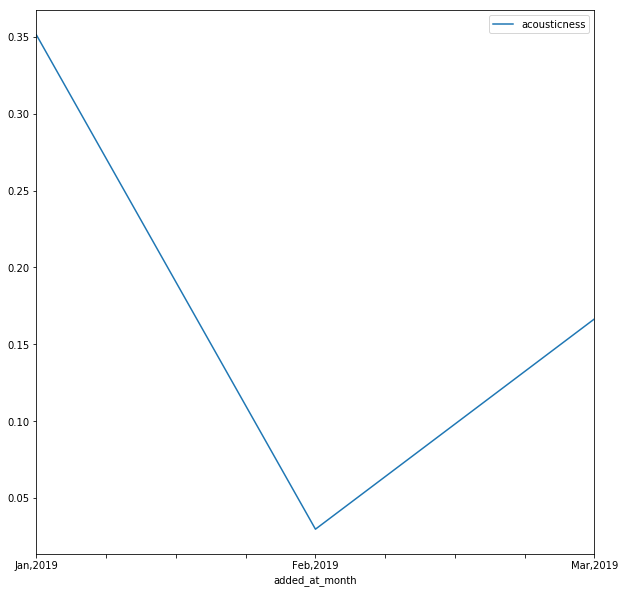

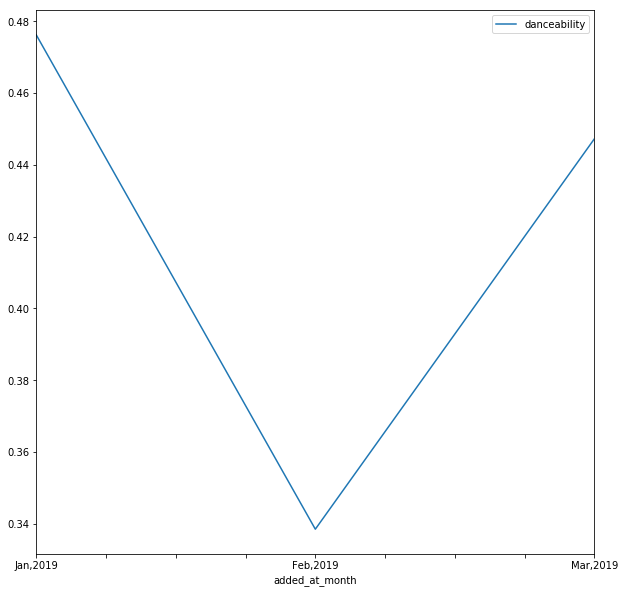

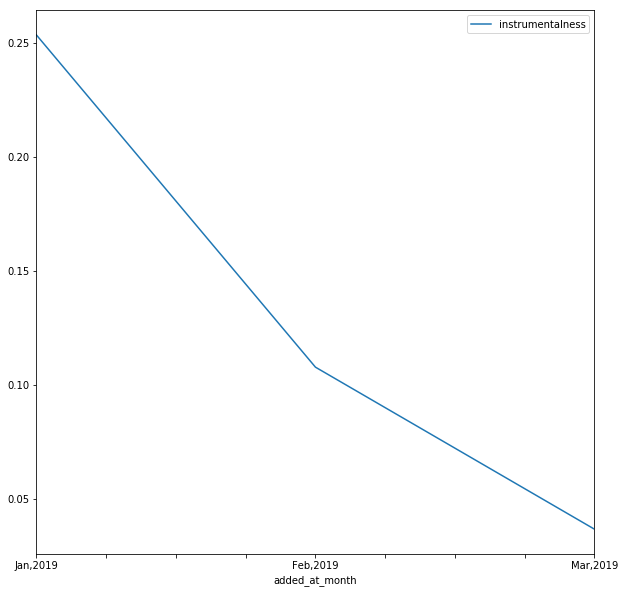

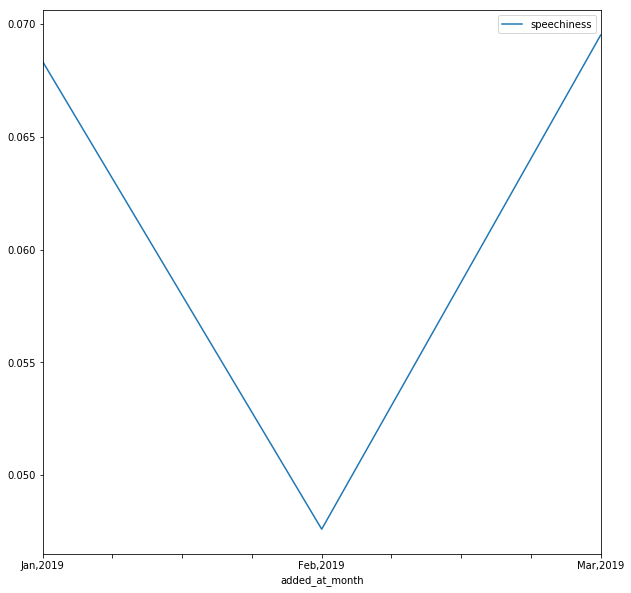

In [5]:

df_mean = df_saved_tracks.loc[df_saved_tracks['added_at_year'] == 2019]
print(df_mean)

df_mean =  df_mean.groupby(['added_at_month']).mean().sort_values('added_at_month_index')
print(df_mean)


df_mean.plot(kind = 'line',y='acousticness', figsize = (10,10))
plt.show()

df_mean.plot(kind = 'line',y='danceability',figsize = (10,10))
plt.show()

df_mean.plot(kind = 'line',y='instrumentalness', figsize = (10,10))
plt.show()

df_mean.plot(kind = 'line',y='speechiness', figsize = (10,10))
plt.show()


#df_mean_frame = pd.DataFrame({'added_at_year' : df_saved_tracks['added_at_year'], 'acousticness': df_mean['acousticness']})
#print(df_mean_frame)
# = pd.DataFrame(df_saved_tracks.groupby(['added_at_year']).mean())
#plt.plot(df_mean_frame['added_at_year'],df_mean_frame['acouticness'] )

